# **PRIMER PARCIAL 02/2024**

In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

In [2]:
# Importar las bibliotecas necesarias

# Cálculo científico y vectorial para python
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [17]:
# Cargar el dataset utilizando pandas y luego convertirlo en un array numpy
file_path = '/content/drive/MyDrive/Colab Notebooks/IA/Primer Parcial/Cleaned_data_for_model.csv'

df = pd.read_csv(file_path)

# Cargar el dataset original
data = pd.read_csv(file_path)
print("Datos cargados correctamente.")
data.head()


Datos cargados correctamente.


,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


# 2. Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [18]:
# Duplicar el dataset y añadir columnas
data_copy = data.copy()

# Añadir columna booleana: `is_expensive`
data_copy['is_expensive'] = np.where(data_copy['price'] > data_copy['price'].mean(), 1, 0)

# Añadir columna de texto: `description`
descriptions = ["Spacious", "Luxurious", "Cozy", "Modern", "Traditional"]
data_copy['description'] = np.random.choice(descriptions, size=len(data_copy))

# Añadir columna de caracteres: `rating`
ratings = ['A', 'B', 'C']
data_copy['rating'] = np.random.choice(ratings, size=len(data_copy))

# Mostrar el dataset con las nuevas columnas
print("Nuevas columnas añadidas:")
data_copy.head()


Nuevas columnas añadidas:


,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,is_expensive,description,rating
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,0,Traditional,C
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,0,Luxurious,A
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,1,Luxurious,A
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,1,Cozy,A
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,0,Spacious,A


# 3.  Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

In [19]:
# Duplicar y modificar valores
data_extended = pd.concat([data_copy, data_copy], ignore_index=True)

# Modificar ligeramente los valores del dataset duplicado
data_extended['price'] *= np.random.uniform(0.95, 1.05, size=len(data_extended))
data_extended['bedrooms'] = np.random.choice(range(1, 6), size=len(data_extended)) # Alterar número de dormitorios
data_extended['Area_in_Marla'] *= np.random.uniform(0.9, 1.1, size=len(data_extended))

# Mostrar el dataset duplicado
print("Dataset duplicado y modificado:")
data_extended.head()


Dataset duplicado y modificado:


,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,is_expensive,description,rating
0,0,Flat,1.027937e+07,G-10,Islamabad,2,For Sale,2,4.247588,0,Traditional,C
1,1,Flat,6.911367e+06,E-11,Islamabad,3,For Sale,4,5.545511,0,Luxurious,A
2,2,House,1.696411e+07,G-15,Islamabad,6,For Sale,4,8.241654,1,Luxurious,A
3,3,House,4.288270e+07,Bani Gala,Islamabad,4,For Sale,3,38.917605,1,Cozy,A
4,4,House,6.678842e+06,DHA Defence,Islamabad,3,For Sale,4,7.993507,0,Spacious,A


# 4.Dividir los datos del dataset sintético en datos de entrenamiento y prueba

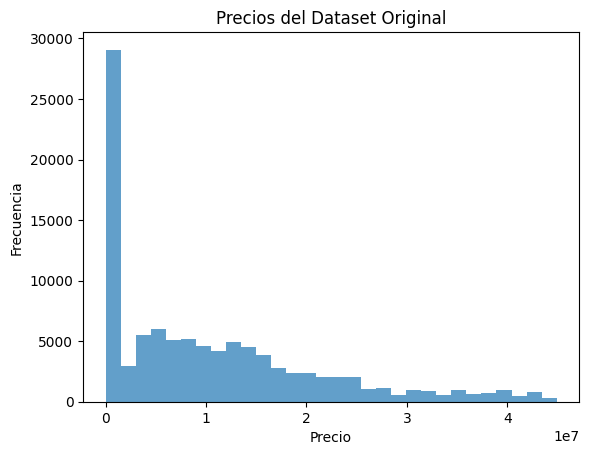

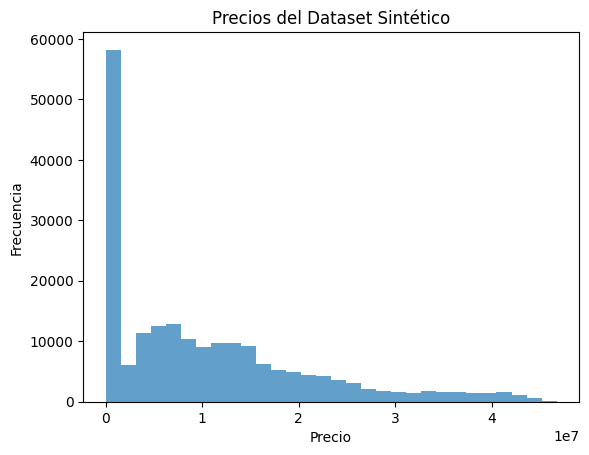

In [20]:
# Función para graficar histogramas
def plot_histogram(data, column_name, title, xlabel, ylabel):
    plt.hist(data[column_name].astype(float), bins=30, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Gráfico de precios del dataset original
plot_histogram(data, 'price', 'Precios del Dataset Original', 'Precio', 'Frecuencia')

# Gráfico de precios del dataset sintético
plot_histogram(data_extended, 'price', 'Precios del Dataset Sintético', 'Precio', 'Frecuencia')

# 5. Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

In [21]:
# Dividir el dataset sintético en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Convertir a numpy array para consistencia con Numpy puro
data_extended_np = data_extended.to_numpy()

# Definir características (X) y etiquetas (y) para clasificación de `property_type`
X = data_extended_np[:, [1, 6, 7]] # Usar 'price', 'bedrooms' y 'Area_in_Marla'
y = data_extended_np[:, 0] # 'property_type'

# Codificar etiquetas para one-vs-all (se puede usar 'property_type' o cualquier otra columna relevante)
unique_classes, y_encoded = np.unique(y, return_inverse=True)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")


Datos de entrenamiento: (139298, 3), (139298,)
Datos de prueba: (59700, 3), (59700,)


# 6. Entrenar un modelo One-vs-All para reemplazar el modelo desarrollado en los puntos 5 y 6.

In [28]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))
    return cost

# Gradiente descendente
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        theta -= (learning_rate/m) * np.dot(X.T, (h - y))
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Preparar los datos para el modelo
m, n = X_train.shape

# Convertir X_train y y_train a tipo float
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Añadir columna de 1s para el término de sesgo
X_train_bias = np.c_[np.ones((m, 1)), X_train]

# Inicializar theta como un array de ceros de tipo float
theta = np.zeros(n + 1).astype(float)

# Configuración del modelo
learning_rate = 0.01
iterations = 1000

# Entrenar modelo de regresión logística
theta, cost_history = gradient_descent(X_train_bias, y_train, theta, learning_rate, iterations)

# Gráfico del costo a través de las iteraciones
plt.plot(range(iterations), cost_history)
plt.title("Costo durante el entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.show()



ValueError: could not convert string to float: 'House'